# PCA - Principal Component Analysis

In [1]:
# Includes:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import sklearn

In [2]:
# utility functions for the project
def vcol(v):
    return np.array(v).reshape(v.size, 1)

def vrow(v):
    return np.array(v).reshape(1, v.size)

def loadIris():
    f = open("iris.csv", "r")
    lines = f.readlines()
    D = []
    L = []

    for line in lines:
        fields = line.split(",")
        type = fields[4].strip("\n")
        if(type == "Iris-setosa"):
            L.append(0)
        elif(type == "Iris-versicolor"):
            L.append(1)
        else:
            L.append(2)
        D.append(fields[0:4])


    f.close()
    return (np.array(D, dtype=np.float64).T, np.array(L, dtype=np.int32))

In [3]:
def compute_pca(D, m):
    # get covariance matrix
    mu = vcol(np.mean(D, axis=1))
    C = (D - mu) @ (D - mu).T / D.shape[1]

    # print C and mu
    print("Covariance matrix C:")
    print(C)
    print("Mean vector mu:")
    print(mu)

    # get eigenvalues and eigenvectors
    s, U = np.linalg.eigh(C)
    P = U[:, ::-1][:, 0:m]
    
    return P


Covariance matrix C:
[[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]
Mean vector mu:
[[5.84333333]
 [3.05733333]
 [3.758     ]
 [1.19933333]]
PCA matrix P:
[[-0.36138659  0.65658877]
 [ 0.08452251  0.73016143]
 [-0.85667061 -0.17337266]
 [-0.3582892  -0.07548102]]


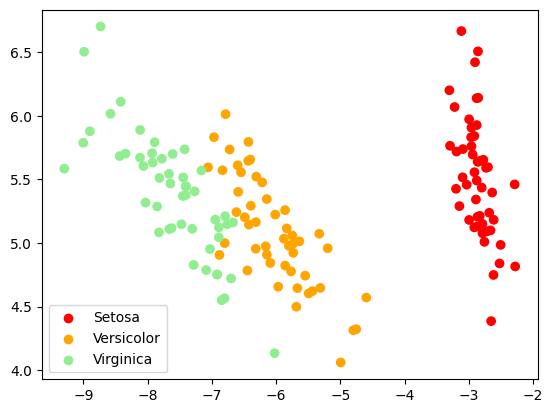

In [4]:
(D, L) = loadIris()
P = compute_pca(D, 2)
print("PCA matrix P:")  
print(P)

# we can apply the projection to a single point x or to a matrix of samples D
# example
x = D[:, 0]
y = P.T@x
DP = P.T@D

# plot the data
colors = ["red", "orange", "lightgreen"]
leg = ["Setosa", "Versicolor", "Virginica"]

plt.scatter(DP[0, :], DP[1, :], c=[colors[i] for i in L])
for i in range(3):
    plt.scatter([], [], c=colors[i], label=leg[i])
plt.legend()
plt.show()

## LDA - Linear Discriminant Analysis

In [5]:
# LDA
def compute_lda(D, L, m, num_classes):

    C_i = np.zeros((4, 4))
    Cw = 0
    Cb = 0
    ni = np.zeros((1,3))
    mu_i = np.zeros((4,3))
    # compute per class mean and covariance 
    for i in range(num_classes):
        Dc = D[:, L == i]
        mu_i[:,i] = np.mean(Dc, axis=1)
        C_i = (Dc - vcol(mu_i[:,i])) @ (Dc - vcol(mu_i[:,i])).T 
        Cw += C_i
        ni[0, i] = Dc.shape[1]

    Cw = Cw/D.shape[1]
    print(f"Cw: {Cw}\n\nCb:{Cb}")
    
    mu = np.mean(D, axis=1)
    Cb = ni*(mu_i-vcol(mu))@(mu_i-vcol(mu)).T/D.shape[1]
    s, U = scipy.linalg.eigh(Cb, Cw)
    W = U[:, ::-1][:, 0:m]

    UW, _, _ = np.linalg.svd(W)
    P = UW[:, 0:m]
    return P

In [6]:
# get the values
(D, L) = loadIris()
m = 2
U = compute_lda(D, L, m, 3)

Cw: [[0.259708   0.09086667 0.164164   0.03763333]
 [0.09086667 0.11308    0.05413867 0.032056  ]
 [0.164164   0.05413867 0.181484   0.041812  ]
 [0.03763333 0.032056   0.041812   0.041044  ]]

Cb:0


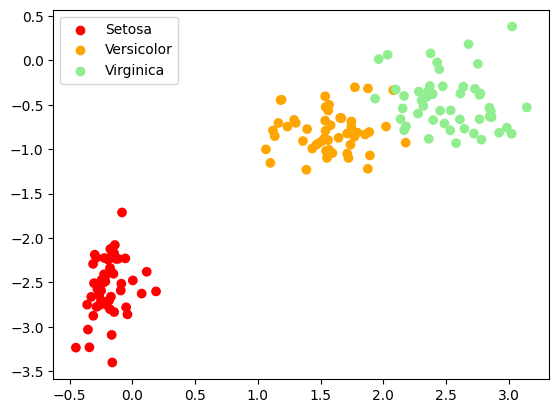

In [7]:
# plot the data
colors = ["red", "orange", "lightgreen"]
leg = ["Setosa", "Versicolor", "Virginica"]

P = U[:, 0:m]
DP = P.T@D

plt.scatter(DP[0, :], DP[1, :], c=[colors[i] for i in L])
for i in range(3):
    plt.scatter([], [], c=colors[i], label=leg[i])
plt.legend()
plt.show()

# PCA & LDA

In [8]:
def load_iris():
    return sklearn.datasets.load_iris()['data'].T, sklearn.datasets.load_iris()['target']
DIris, LIris = load_iris()
D = DIris[:, LIris != 0]
L = LIris[LIris != 0]

In [9]:
def split_db_2to1(D, L, seed=0):
    nTrain = int(D.shape[1]*2.0/3.0)
    np.random.seed(seed)
    idx = np.random.permutation(D.shape[1])
    idxTrain = idx[0:nTrain]
    idxTest = idx[nTrain:]
    DTR = D[:, idxTrain]
    DVAL = D[:, idxTest]
    LTR = L[idxTrain]
    LVAL = L[idxTest]
    return (DTR, LTR), (DVAL, LVAL)

In [10]:
# DTR and LTR are model training data and labels
# DVAL and LVAL are validation data and labels
(DTR, LTR), (DVAL, LVAL) = split_db_2to1(D, L)

P_lda = compute_lda(DTR, LTR-1, 1, 2)
DTR_lda = P_lda.T@DTR

threshold = (DTR_lda[0, LTR==1].mean() + DTR_lda[0, LTR==2].mean()) / 2.0 
# Projected samples have only 1 dimension

Cw: [[0.35965686 0.08608957 0.25417892 0.05976939]
 [0.08608957 0.0863848  0.07172516 0.03702262]
 [0.25417892 0.07172516 0.26834642 0.06520304]
 [0.05976939 0.03702262 0.06520304 0.04909063]]

Cb:0


In [11]:
PVAL = np.zeros(shape=LVAL.shape, dtype=np.int32)
DVAL_lda = P_lda.T@DVAL

PVAL[DVAL_lda[0] >= threshold] = 2
PVAL[DVAL_lda[0] < threshold] = 1

print(f"mean error: {(LVAL-PVAL).mean()}\nAbs error: {(LVAL-PVAL).sum()}\nTotal validation samples: {LVAL.shape[0]}")

mean error: 0.0
Abs error: 0
Total validation samples: 34


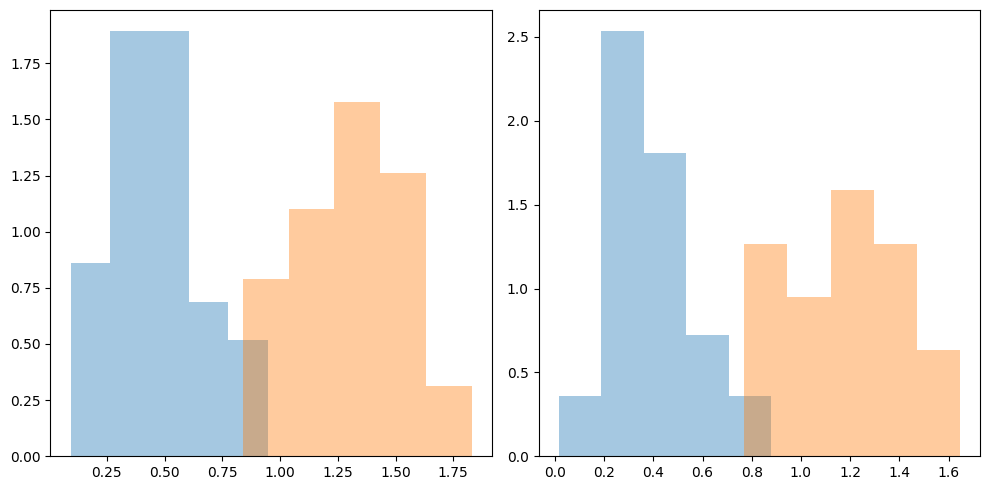

In [26]:
# centered data can be plotted again
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].hist(DTR_lda[0, LTR == 1], bins=5, density=True, alpha=0.4, label="versicolor")
axes[0].hist(DTR_lda[0, LTR == 2], bins=5, density=True, alpha=0.4, label="virginica")

axes[1].hist(DVAL_lda[0, LVAL == 1], bins=5, density=True, alpha=0.4, label="versicolor")
axes[1].hist(DVAL_lda[0, LVAL == 2], bins=5, density=True, alpha=0.4, label="virginica")


plt.tight_layout()
plt.show()

In [12]:
LVAL

array([1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1])

In [13]:
PVAL

array([1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1], dtype=int32)